# Import Library

In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Visuzliation Setting
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
from matplotlib import colors
import seaborn as sns
color_palette = 'Set3'
title_size = 20
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'

# Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score


In [2]:
root = os.path.join(os.getcwd(), 'DATA')

## Import Data

In [3]:
df_raw = pd.read_csv(os.path.join(root, 'preproecessed_train_2.csv'))

In [4]:
train, target = df_raw.drop(columns=['P_PRICE']), df_raw['P_PRICE']

## Set Metric

In [5]:
def RMSE(y, y_pred):
    return mean_squared_error(y, y_pred)**0.5

cnt = 6
def train_model(train_data, target_data, model=LinearRegression()):  # baseline model : LInearRegression
    global cnt
    cnt += 1
    x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, random_state=0)

    model.fit(x_train, y_train)
    print("Model Training Complete!")

    pred_train, pred_test = model.predict(x_train), model.predict(x_test)
    
    plt.figure(figsize=(10, 8))
#     plt.scatter(pred_train, y_train, s=10)
    sns.regplot(pred_train, y_train, color='g')
    plt.xlabel("Predicted price")
    plt.ylabel("Actual price")
    plt.savefig(os.path.join(root, 'IMAGES', str(cnt) + '.png'), transparent=True)
    plt.show()

    # cvs = cross_val_score(model, x_test, y_test, cv = 5)
    # print(">> cross_val_score mean =", cvs.mean())
    print(">> RMSE train =", RMSE(y_train, pred_train))
    print(">> RMSE validation =", RMSE(y_test, pred_test))
#     print(">> MAE train =", mean_absolute_error(pred_train, y_train))
#     print(">> MAE validation =", mean_absolute_error(pred_test, y_test))
    print("-------------------------------------------------")
    
    return model

    
def print_importance(model, df, added_columns):
    importance = model.coef_
    fs_data = []
    for i, x in enumerate(importance):
        fs_data.append([abs(x), df.columns[i]])
    fs_data.sort(key=lambda x: x[0], reverse=True)
   
    # 추가한 컬럼의 중요도
    for i in range(len(fs_data)):
        if fs_data[i][1] in added_columns:
            print(fs_data[i][1], ":", fs_data[i][0] ,">", i, "순위")
    print("-------------------------------------------------")
    print("총", len(fs_data) , "개")
    
    return fs_data

Model Training Complete!


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


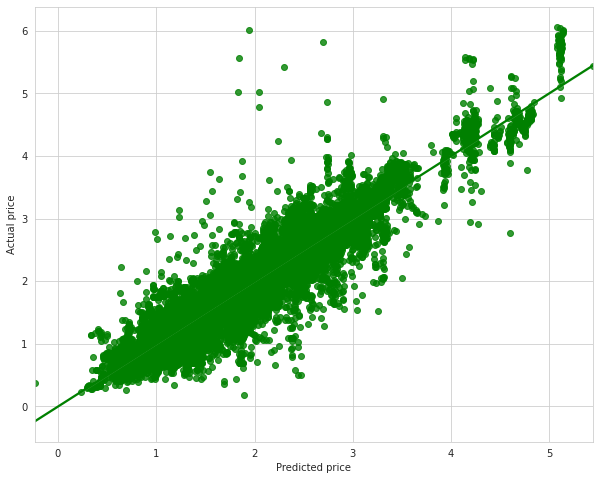

>> RMSE train = 0.26123934410790584
>> RMSE validation = 0.2714239232444366
-------------------------------------------------


LinearRegression()

In [6]:
train_model(train, target)

Model Training Complete!


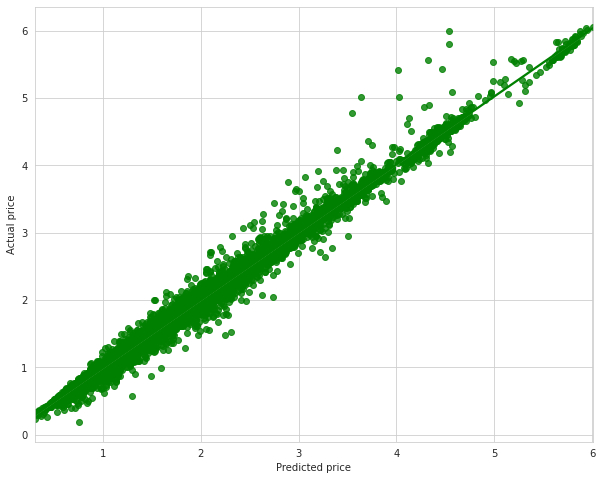

>> RMSE train = 0.06098499226031969
>> RMSE validation = 0.16651887319975656
-------------------------------------------------


RandomForestRegressor()

In [7]:
from sklearn.ensemble import RandomForestRegressor
train_model(train, target, RandomForestRegressor())

Model Training Complete!


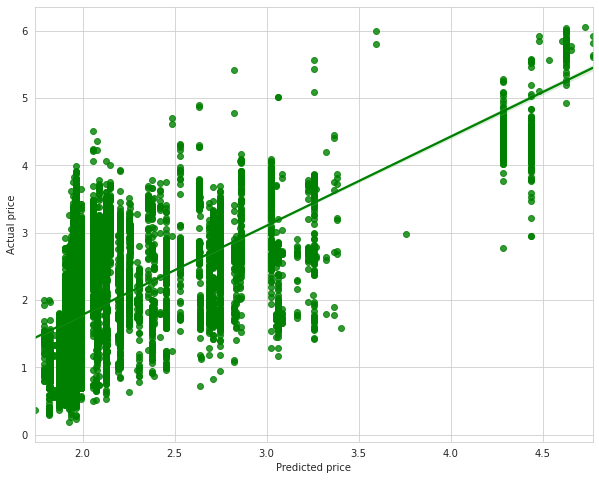

>> RMSE train = 0.6673324343461307
>> RMSE validation = 0.6705267428408638
-------------------------------------------------


AdaBoostRegressor()

In [8]:
from sklearn.ensemble import AdaBoostRegressor
train_model(train, target, AdaBoostRegressor())

In [9]:
from xgboost import XGBRegressor
train_model(train, target, XGBRegressor())

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.neural_network import MLPRegressor
train_model(train, target, MLPRegressor())

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Function for splitting training and validation data
def split_vals(a, n : int): 
    return a[:n].copy(), a[n:].copy()

val_perc = 0.1 # % to use for validation set
n_valid = int(val_perc * 100000) 
n_trn = len(df_train)-n_valid

# Split data
raw_train, raw_valid = split_vals(df_train, n_trn)
X_train, X_valid = split_vals(df_train, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.transform(X_valid)

# Check dimensions of samples
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

- metric 선정하기
- base model 선정 > 전처리 최소화 + linear regression model 로 정확도 구하기
- 모델마다 최적화하기
- 모델끼리 비교하기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=500,random_state=0)
model.fit(x_train,y_train)
cross = cross_val_score(model,x_test,y_test,cv = 5)

print('cross_tree',cross.mean())

In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train,y_train)
cross_svr = cross_val_score(model,x_test,y_test,cv = 5)
print('cross_svr',cross_svr.mean())

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=500,learning_rate=0.05,max_depth=3)
model.fit(x_train,y_train)
cross_xgboost = cross_val_score(model,x_test,y_test,cv = 5)

print('cross_xgboost : ',cross_xgboost.mean())

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

cross_linear = cross_val_score(model,x_test,y_test,cv = 5)
print(cross_linear)
print('cross_linear : ',cross_linear.mean())

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor().fit(x_train,y_train)
cross_MLP = cross_val_score(model,x_test,y_test,cv = 5)

print('croos_MLP : ',cross_MLP.mean())

# ============================참고===========================

# 4. Model Data

## Set metrics(MAE)

In [ ]:
# Metric used for the PUBG competition (Mean Absolute Error (MAE))
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Function to print the MAE (Mean Absolute Error) score
# This is the metric used by Kaggle in this competition
def print_score(m : LinearRegression):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(m.predict(X_valid), y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

## XGBoost Model 
### for train sampling

### import the model

In [ ]:
import xgboost

In [ ]:
sample = train.iloc[0:100000]
original = sample.drop(columns=['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired'])
target = sample['winPlacePerc']

### split data for training and validation

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Function for splitting training and validation data
def split_vals(a, n : int): 
    return a[:n].copy(), a[n:].copy()

val_perc = 0.1 # % to use for validation set
n_valid = int(val_perc * 100000) 
n_trn = len(original)-n_valid

# Split data
raw_train, raw_valid = split_vals(sample, n_trn)
X_train, X_valid = split_vals(original, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.transform(X_valid)

# Check dimensions of samples
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

In [ ]:
# Train basic model
#m1 = LinearRegression()
#m1.fit(X_train, y_train)
#print_score(m1)

In [ ]:
# Train basic model
m1 = xgboost.XGBRegressor(random_state=42,n_estimators=400, subsample = 0.8, colsample_bytree=1,max_depth=7, learning_rate=0.08)
m1.fit(X_train, y_train)
print_score(m1)

### for df_wrangle sampling

In [ ]:
## 바꿔야함
sample = df_wrangle.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns = ['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired']) #all columns except target
target = sample['winPlacePerc'] # Only target variable

## Split data for training and validation
csv를 pickle, json으로 바꿔서 한다.
모델 별로 파일을 나누장
데이터로 나눠도 됨..

비쥬얼라이젼을 좀 더 이쁘게 해서
상관계수 예쁘게 분석


In [ ]:
n_trn = len(original)-n_valid

# Split data
X_train, X_valid = split_vals(original, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.transform(X_valid)

# Check dimensions of samples
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

In [ ]:
# Train basic model
#m2 = LinearRegression()
#m2.fit(X_train, y_train)
#print_score(m2)

In [ ]:
# Train basic model
m2 = xgboost.XGBRegressor(random_state=42,n_estimators=400, subsample = 0.8, colsample_bytree=1,max_depth=7, learning_rate=0.08)
m2.fit(X_train, y_train)
print_score(m2)

## Feature Importance

In [ ]:
def xgb_feat_importance(m, df):
     return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

In [ ]:
## 바꿔야함
sample = df_wrangle.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns = ['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired']) #all columns except target
target = sample['winPlacePerc'] # Only target variable

In [ ]:
# What are the most predictive features according to our basic random forest model
fi = xgb_feat_importance(m2, original); fi[:10]

# Plot a feature importance graph for the 20 most important features
plot1 = fi[:20].plot('cols', 'imp', figsize=(14,6), legend=False, kind = 'barh', title='Top 20 important features')

In [ ]:
# Keep only significant features
#to_keep = fi[fi.imp>0.005].cols
to_keep = fi[fi.imp>0.005].cols
print('Significant features: ', len(to_keep))
to_keep.describe()

In [ ]:
to_keep

In [ ]:
list(to_keep)

In [ ]:
#왜 20개로 했는지 역치 생각해보기

## Keep only significant features

In [ ]:
sample = df_wrangle.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns =['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired']) #all columns except target
#to_keep_drop_high_corr = list(set(list(to_keep)) - set(['killStreaks', 'damageDealt','maxPlace','numGroups', 'matchId_cat', 'groupId_cat']))
#original = original[to_keep_drop_high_corr]
original = original[to_keep]
target = sample['winPlacePerc'] # Only target variable

In [ ]:
n_trn = len(original)-n_valid

# Split data
raw_train, raw_valid = split_vals(sample, n_trn)
X_train, X_valid = split_vals(original, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.fit_transform(X_valid)

original.columns

# Check dimensions of data
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

In [ ]:
# You should get better results by increasing n_estimators
# and by playing around with the parameters
m3 = xgboost.XGBRegressor(random_state=42,n_estimators=400, subsample = 0.8, colsample_bytree=1,max_depth=7, learning_rate=0.08)
m3.fit(X_train, y_train)
print_score(m3)

In [ ]:
## 바꿔야함
sample = train.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns = ['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired']) #all columns except target
target = sample['winPlacePerc'] # Only target variable

In [ ]:
# What are the most predictive features according to our basic random forest model
fi = xgb_feat_importance(m1, original); fi[:10]

# Plot a feature importance graph for the 20 most important features
plot1 = fi[:20].plot('cols', 'imp', figsize=(14,6), legend=False, kind = 'barh', title='Top 20 important features')

In [ ]:
# Keep only significant features
#to_keep = fi[fi.imp>0.005].cols
to_keep = fi[fi.imp>0.015].cols
print('Significant features: ', len(to_keep))
to_keep.describe()

In [ ]:
sample = train.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns = ['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired']) #all columns except target
to_keep_drop_high_corr = list(set(list(to_keep)) - set(['killStreaks', 'damageDealt','maxPlace','numGroups', 'matchId_cat', 'groupId_cat']))
#original = original[to_keep_drop_high_corr]
original = original[to_keep]
target = sample['winPlacePerc'] # Only target variable

In [ ]:
n_trn = len(original)-n_valid

# Split data
raw_train, raw_valid = split_vals(sample, n_trn)
X_train, X_valid = split_vals(original, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.fit_transform(X_valid)

original.columns

# Check dimensions of data
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

In [ ]:
# You should get better results by increasing n_estimators
# and by playing around with the parameters
m4 = xgboost.XGBRegressor(random_state=42,n_estimators=400, subsample = 0.8, colsample_bytree=1,max_depth=7, learning_rate=0.08)
m4.fit(X_train, y_train)
print_score(m4)

In [ ]:
## 바꿔야함
sample = df_wrangle.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns = ['winPlacePerc']) #all columns except target
target = sample['winPlacePerc'] # Only target variable

In [ ]:
original = original.drop(columns = ['killStreaks', 'damageDealt','maxPlace','numGroups', 'matchId_cat', 'groupId_cat'])

In [ ]:
X_train, X_valid = split_vals(original, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.transform(X_valid)

# Check dimensions of samples
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

In [ ]:
# Train basic model
m5 = xgboost.XGBRegressor(random_state=42,n_estimators=400, subsample = 0.8, colsample_bytree=1,max_depth=7, learning_rate=0.08)
m5.fit(X_train, y_train)
print_score(m5)

In [ ]:
## 바꿔야함
sample = df_wrangle.iloc[0:100000]
# Split sample into training data and target variable
original = sample.drop(columns = ['winPlacePerc', 'kills','matchDuration','damageDealt','maxPlace','weaponsAcquired']) #all columns except target
target = sample['winPlacePerc'] # Only target variable

In [ ]:
to_keep_ = ['assists', 'DBNOs', 'killPlace',
       'longestKill', 'numGroups', 
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'weaponsAcquiredNorm',
       'healsandboosts', 'totalDistance']
original = original[to_keep_]

In [ ]:
X_train, X_valid = split_vals(original, n_trn)
y_train, y_valid = split_vals(target, n_trn)

X_train=sc.fit_transform(X_train)
X_valid=sc.transform(X_valid)

# Check dimensions of samples
print('Sample train shape: ', X_train.shape, 
      '\nSample target shape: ', y_train.shape, 
      '\nSample validation shape: ', X_valid.shape)

In [ ]:
# Train basic model
m6 = xgboost.XGBRegressor(random_state=42,n_estimators=400, subsample = 0.8, colsample_bytree=1,max_depth=7, learning_rate=0.08)
m6.fit(X_train, y_train)
print_score(m6)

In [ ]:
# 백만개로 training , validation split 
# test에도 

## Correlations
+ Correlation Heatmap

In [ ]:
# # Correlation heatmap
# corr = significant.corr()

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Create heatmap
# heatmap = sns.heatmap(corr)